<a href="https://colab.research.google.com/github/Subash1305/Machine_Learning_Practice/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer_Convertion_Prediction_Problem_Statement

# Importing all the required packages

In [1]:
#importing the required package

import pandas as pd  # read the dataset

import numpy as np  # to handle the arrays

import warnings

warnings.simplefilter(action = 'ignore' , category = FutureWarning)

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score, roc_auc_score

from sklearn import metrics

import seaborn as sns # plotting the data

import matplotlib.pyplot as plt # plotting the data

In [2]:
df = pd.read_csv('Final.csv')  # reading the dataset

df.head()  # viewing the 1st five row of the dataset

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape  # checking the rows and columns

(45211, 11)

# **Pre-Processing The Data**


# 1). Clean

In [4]:
df.isnull().sum()  # 1). checking for null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [5]:
df = df.drop_duplicates()  # 2). dropping the duplicates

df.shape  # checking the rows and column after deleting the duplicates

(45205, 11)

In [6]:
df.dtypes  # 3). checking the data type for given features

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df.describe()  # 4). Treating Olutlier

# By IQR method we are treating the outliers

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [8]:
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)  # (q3- q1)

upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr) # (q3 + (1.5 * iqr))

lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold  # there is no need of treating the outlier outlier

(70.5, 10.5)

In [9]:
df.age = df.age.clip(lower_threshold, upper_threshold)  # By using the clip function we are treating the outlier

In [10]:
iqr = df['day'].quantile(0.75) - df['day'].quantile(0.25)  # (q3- q1)

upper_threshold = df['day'].quantile(0.75) + (1.5 * iqr) # (q3 + (1.5 * iqr))

lower_threshold = df['day'].quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold  # there is no need of treating the outlier outlier

(40.5, -11.5)

In [11]:
df.day = df.day.clip(lower_threshold, upper_threshold)  # By using the clip function we are treating the outlier

In [12]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)  # (q3- q1)

upper_threshold = df['dur'].quantile(0.75) + (1.5 * iqr) # (q3 + (1.5 * iqr))

lower_threshold = df['dur'].quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold  # there is no need of treating the outlier outlier

(643.0, -221.0)

In [13]:
df.dur = df.dur.clip(lower_threshold, upper_threshold)  # By using the clip function we are treating the outlier

In [14]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)  # (q3- q1)

upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr) # (q3 + (1.5 * iqr))

lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)  # (q1 - (1.5 * iqr))

upper_threshold , lower_threshold  # there is no need of treating the outlier outlier

(6.0, -2.0)

In [15]:
df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)  # By using the clip function we are treating the outlier

# **we throughly cleaned the data**
# **treated the outliers**
# **dropped the duplicates and checked the null values**
# **data in the right format and structured data**

In [16]:
pd.value_counts(df['call_type'].values)  

cellular     29282
unknown      13017
telephone     2906
dtype: int64

In [17]:
# Replacing the unknown value with the mode

df['job'] = df['job'].replace('unknown','blue-collar') 

In [18]:
# Replacing the unknown value with the mode

df['education_qual'] = df['education_qual'].replace('unknown','secondary')

In [19]:
# Here we done the label encoding fot target variable 

df['target'] = df['y'].map({'yes' : 1, 'no' : 0})

del df['y']

# 2). Encode

## EDA 

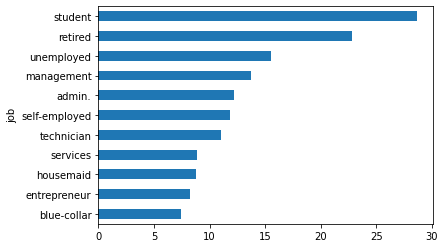

In [20]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is no Linear Releation but there is Ordinal Releation

(df.groupby('job')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [21]:
# Here we checking the percentage of the job column who are converted

df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

In [22]:
# Here we are doing the Label Encoding

df['job'] = df['job'].map({'blue-collar' : 0, 'entrepreneur' : 1, 'housemaid' : 2, 'services' : 3, 'technician' : 4, 'self-employed' : 5, 'admin.' : 6, 'management' : 7, 'unemployed' : 8, 'retired' : 9, 'student' : 10})

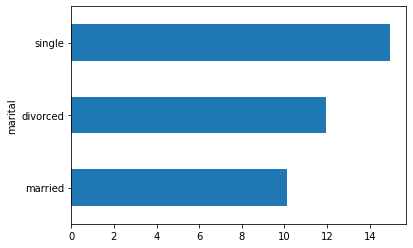

In [23]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is some sort of Linear Releation 

(df.groupby('marital')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [24]:
# Here we checking the percentage of the martial column who are converted

df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [25]:
# Here we are doing the Label Encoding

df['marital'] = df['marital'].map({'married' : 0, 'divorced' : 1, 'single' : 2})

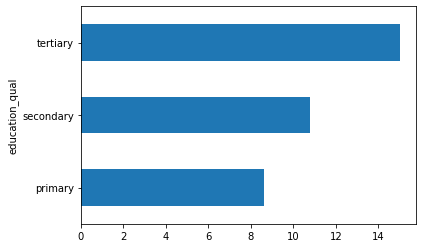

In [26]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is some sort of Linear Releation

(df.groupby('education_qual')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [27]:
# Here we checking the percentage of the education_qual column who are converted

df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: target, dtype: float64

In [28]:
# Here we are doing the Label Encoding

df['education_qual'] = df['education_qual'].map({'primary' : 0, 'secondary' : 1, 'tertiary' : 2})

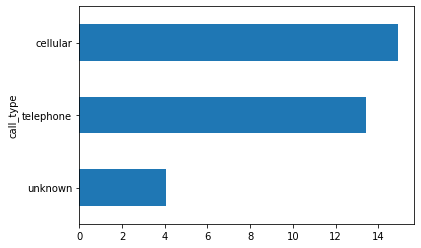

In [29]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is some sort of Linear Releation

(df.groupby('call_type')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [30]:
# Here we checking the percentage of the call_type column who are converted

df.groupby('call_type')['target'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [31]:
# Here we are doing the Label Encoding

df['call_type'] = df['call_type'].map({'unknown' : 0, 'telephone' : 1, 'cellular' : 2})

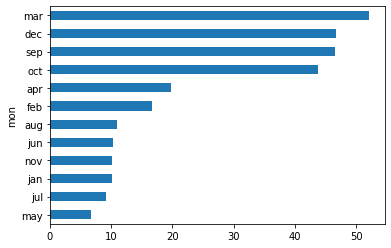

In [32]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is some sort of Linear Releation

(df.groupby('mon')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [33]:
# Here we checking the percentage of the month column who are converted

df.groupby('mon')['target'].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [34]:
df['mon'] = df['mon'].map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5, 'feb': 6, 'apr':7, 'oct': 8, 'sep':9, 'dec':10, 'mar':11})

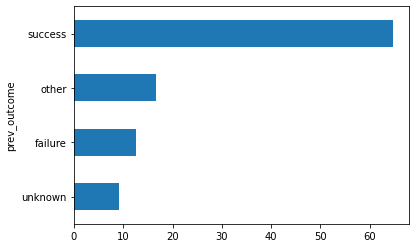

In [35]:
# Here we introduced the order in the data (Ordinal)
# So we are doing the label encoding
# there is some sort of Linear Releation

(df.groupby('prev_outcome')['target'].mean()*100).sort_values().plot(kind = 'barh')

In [36]:
# Here we checking the percentage of the prev_outcome column who are converted

df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [37]:
# Here we are doing the Label Encoding

df['prev_outcome'] = df['prev_outcome'].map({'unknown' : 0, 'failure' : 1, 'other' : 2, 'success' : 3})

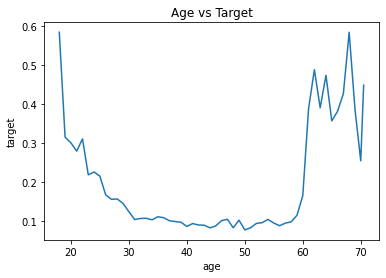

In [38]:
df.groupby('age')['target'].mean().plot()

# df.plot(x='age', y='target', style='o')

plt.title('Age vs Target')

plt.xlabel('age')

plt.ylabel('target')

plt.show()

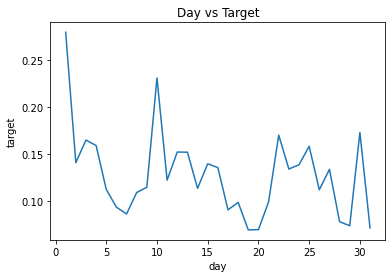

In [39]:
df.groupby('day')['target'].mean().plot()

# df.plot(x='day', y='target', style='o')

plt.title('Day vs Target')

plt.xlabel('day')

plt.ylabel('target')

plt.show()

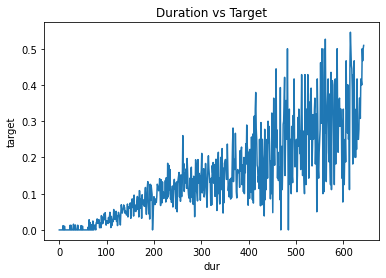

In [40]:
df.groupby('dur')['target'].mean().plot()

# df.plot(x='dur', y='target', style='o')

plt.title('Duration vs Target')

plt.xlabel('dur')

plt.ylabel('target')

plt.show()

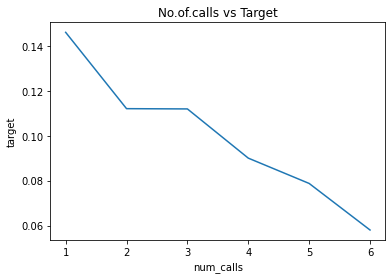

In [41]:
df.groupby('num_calls')['target'].mean().plot()

# df.plot(x='num_calls', y='target', style='o')

plt.title('No.of.calls vs Target')

plt.xlabel('num_calls')

plt.ylabel('target')

plt.show()

# 3). Train And Split

In [42]:
labels = df.columns[:10]  # Extracting all the feature except the target variable

X = df[labels].values  # Taking all the feature as a array

y = df['target'].values  # Taking the target variable as a array

In [43]:
from sklearn.model_selection import train_test_split #import the required function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # training the data with the balanced data 

[]

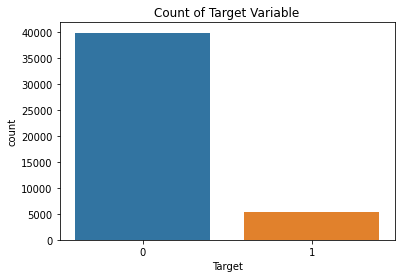

In [44]:
sns.countplot(x = df['target'])

plt.xlabel('Target')

plt.title('Count of Target Variable')

plt.plot()

#  Target variable is highly imbalanced
#  So, we need to balance the data

# 4). Balance the Data

# Oversampling followed by Undersampling

In [45]:
# importing the required package for balancing the data

from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')  # initializing the smoteenn

X_smt, y_smt = smt.fit_resample(X_train, y_train)  # by fitting the data by cluster centroid and SMOTE is done

# 5). Scaling the data

In [46]:
# importing the required package

from sklearn.preprocessing import StandardScaler ## standrard scaling

scaler = StandardScaler() #initialise to a variable

scaler.fit(X_smt) # we are finding the values of mean and sd from the td

X_train_scaled = scaler.transform(X_smt) # fit (mean, sd) and then transform the training data

# only fit the training data not the test data

X_test_scaled = scaler.transform(X_test) # transform the test data

# **MODEL**

# Task--> Supervised Learning

# Where the target variable is given

# Here the target variable is categorical data so we are using the Classification Algorithms

# Model For Logistic Regression --> (y = (1 / (1 + e^-(m * x - c)))


# LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression  # importing the required package to build the LR model 

logistic_regression= LogisticRegression()  # initialise the required package to the variable

logistic_regression.fit(X_train_scaled,y_smt)  # magic happens - best values of betas - training/learning happens here

y_pred=logistic_regression.predict(X_test_scaled)

In [48]:
logistic_regression.predict_proba(X_test_scaled)

array([[0.89801038, 0.10198962],
       [0.21976993, 0.78023007],
       [0.8443856 , 0.1556144 ],
       ...,
       [0.98994292, 0.01005708],
       [0.99568636, 0.00431364],
       [0.8392744 , 0.1607256 ]])

In [49]:
logistic_regression.coef_

array([[ 0.1073897 ,  0.5568849 ,  0.26966625,  0.11966874,  0.45419203,
         0.00367463,  1.32668826,  2.90949051, -0.44289566,  0.9812711 ]])

In [50]:
logistic_regression.intercept_

array([0.67189815])

# **Evaluation Metric**

In [51]:
logistic_regression.score(X_test_scaled,y_test) # Accuracy Score 

0.7645627488571007

In [52]:
accuracy_score(y_test,y_pred)  # another method to print Accuracy

0.7645627488571007

In [53]:
f1_score(y_test,y_pred)  # F1 score

0.46453127620325346

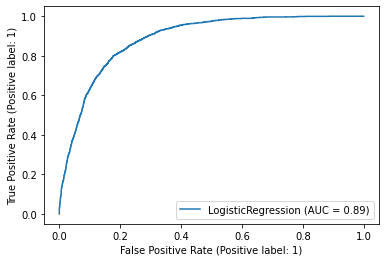

In [54]:
plot_roc_curve(logistic_regression, X_test_scaled, y_test) #AUROC

# **Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

dt.fit(X_train_scaled, y_smt) # it will ask all possible questions, compute the information gain and choose the best split Fit dt to the training set

y_pred = dt.predict(X_test_scaled)  # Predict test set labels

y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
dt.score(X_test_scaled , y_test)  # accuracy for test data

0.8466302905176227

In [57]:
dt.score(X_train_scaled , y_smt)  # accuracy for training data

1.0

# Evaluating the decision tree

Test set accuracy: 0.85
Test set auc: 0.79


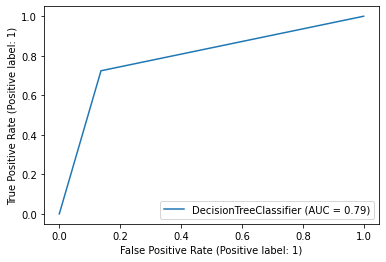

In [58]:
#we compute the eval metric on test/validation set only primarily

y_pred = dt.predict(X_test_scaled) # Model's predictions Predict test set labels

acc = accuracy_score(y_test, y_pred)  # Compute test set accuracy

print("Test set accuracy: {:.2f}".format(acc))

acc = roc_auc_score(y_test, y_pred)

print("Test set auc: {:.2f}".format(acc))

plot_roc_curve(dt, X_test_scaled, y_test)

# Reducing the overfit to the model by fitting the max depth

In [60]:
from sklearn.model_selection import cross_val_score  # import all the functions reqd for cross validation

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    
    dt = DecisionTreeClassifier(max_depth = depth) # will tell the DT to not grow past the given threhsold
    
    dt.fit(X_train_scaled, y_smt) # the model is trained Fit dt to the training set
    
    trainAccuracy = accuracy_score(y_smt, dt.predict(X_train_scaled))    
    
    valAccuracy = cross_val_score(dt, X_train_scaled, y_smt, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
    
    print("Depth  : ", depth," Training Accuracy : ", trainAccuracy,  " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.786127408147131  Cross val score :  0.7861272717403641
Depth  :  2  Training Accuracy :  0.8378063496026297  Cross val score :  0.8377652371121632
Depth  :  3  Training Accuracy :  0.8745891066450298  Cross val score :  0.874027498911154
Depth  :  4  Training Accuracy :  0.8934381891565764  Cross val score :  0.8901306667061432
Depth  :  5  Training Accuracy :  0.9186119086256398  Cross val score :  0.9176968954191077
Depth  :  6  Training Accuracy :  0.9330503890483918  Cross val score :  0.9309912649061081
Depth  :  7  Training Accuracy :  0.940519285981775  Cross val score :  0.9370246833646417
Depth  :  8  Training Accuracy :  0.9524611991844547  Cross val score :  0.9441192234136981
Depth  :  9  Training Accuracy :  0.9598884866641701  Cross val score :  0.9481553118930026
Depth  :  10  Training Accuracy :  0.9678358923147339  Cross val score :  0.9521290303423335
Depth  :  20  Training Accuracy :  0.9996463196438231  Cross val score :  0.956103

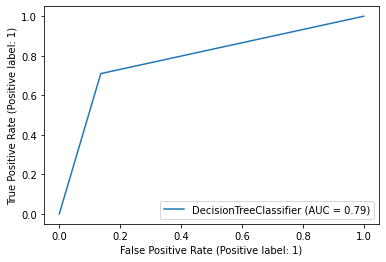

In [61]:
plot_roc_curve(dt, X_test_scaled, y_test)

In [64]:
dt = DecisionTreeClassifier(max_depth = 20) # will tell the DT to not grow past the given threhsold
    
dt.fit(X_train_scaled, y_smt) 

DecisionTreeClassifier(max_depth=20)

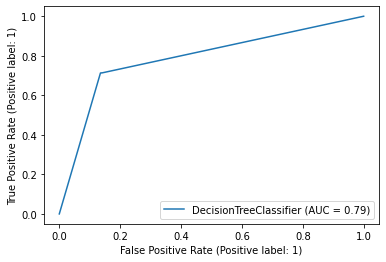

In [65]:
plot_roc_curve(dt, X_test_scaled, y_test)

# **Ensemble Technqiues**
# **Here i'm using XG-boost and Random Forest algorithm for my ml model**

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier  # importing the required package

rf = RandomForestClassifier(n_estimators= 100, max_depth = 4, max_features='sqrt')  # initialize the model

In [67]:
rf.fit(X_train_scaled , y_smt)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [68]:
y_pred = rf.predict(X_test_scaled) # Model's predictions Predict test set labels

y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [69]:
auroc = roc_auc_score(y_pred, y_test)

print("Test set auc: {:.2f}".format(auroc))

Test set auc: 0.65


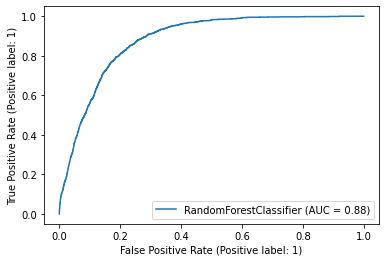

In [70]:
plot_roc_curve(rf, X_test_scaled, y_test)

# **Xg-Boost**

# Model Fitting

In [72]:
import xgboost as xgb

from sklearn.model_selection import cross_val_score

for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_train_scaled,y_smt) #train the model
    model.score(X_test_scaled, y_test) # scoring the model - r2 squared
    print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_smt), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9042774518370574  Cross-Val score :  0.9019682724449648
Learning rate :  0.02  Train score :  0.9238755045146257  Cross-Val score :  0.9220242041945175
Learning rate :  0.03  Train score :  0.9375442100445222  Cross-Val score :  0.9357762568995953
Learning rate :  0.04  Train score :  0.9453667873340823  Cross-Val score :  0.942537992304017
Learning rate :  0.05  Train score :  0.9498189988765448  Cross-Val score :  0.9474687740802465
Learning rate :  0.06  Train score :  0.9530021220821371  Cross-Val score :  0.9503399380896618
Learning rate :  0.07  Train score :  0.9560604169267257  Cross-Val score :  0.9522957270058292
Learning rate :  0.08  Train score :  0.9583281321516248  Cross-Val score :  0.9552293216448721
Learning rate :  0.09  Train score :  0.9605958473765239  Cross-Val score :  0.9557703120735029
Learning rate :  0.1  Train score :  0.9624266633379104  Cross-Val score :  0.9579133106361656
Learning rate :  0.11  Train score :  0.96

In [77]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100)

model.fit(X_smt,y_smt) #train the model

model.score(X_test_scaled, y_test) # scoring the model

[12:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-2.0442083115908622

In [78]:
y_pred = rf.predict(X_test_scaled) # Model's predictions Predict test set labels

y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [79]:
auroc = roc_auc_score(y_pred, y_test)

print("Test set auc: {:.2f}".format(auroc))

Test set auc: 0.65


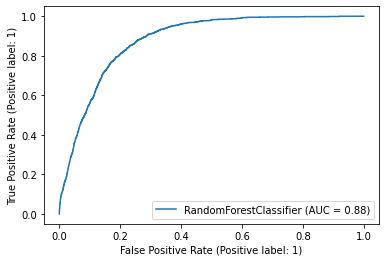

In [80]:
plot_roc_curve(rf, X_test_scaled, y_test)